In [339]:
import pandas as pd
train_url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/train.csv'
test_url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv'

df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

In [340]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [341]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df_train.dtypes.to_string())

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\USER\AppData\Local\Temp\ipykernel_9684\3089850374.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')


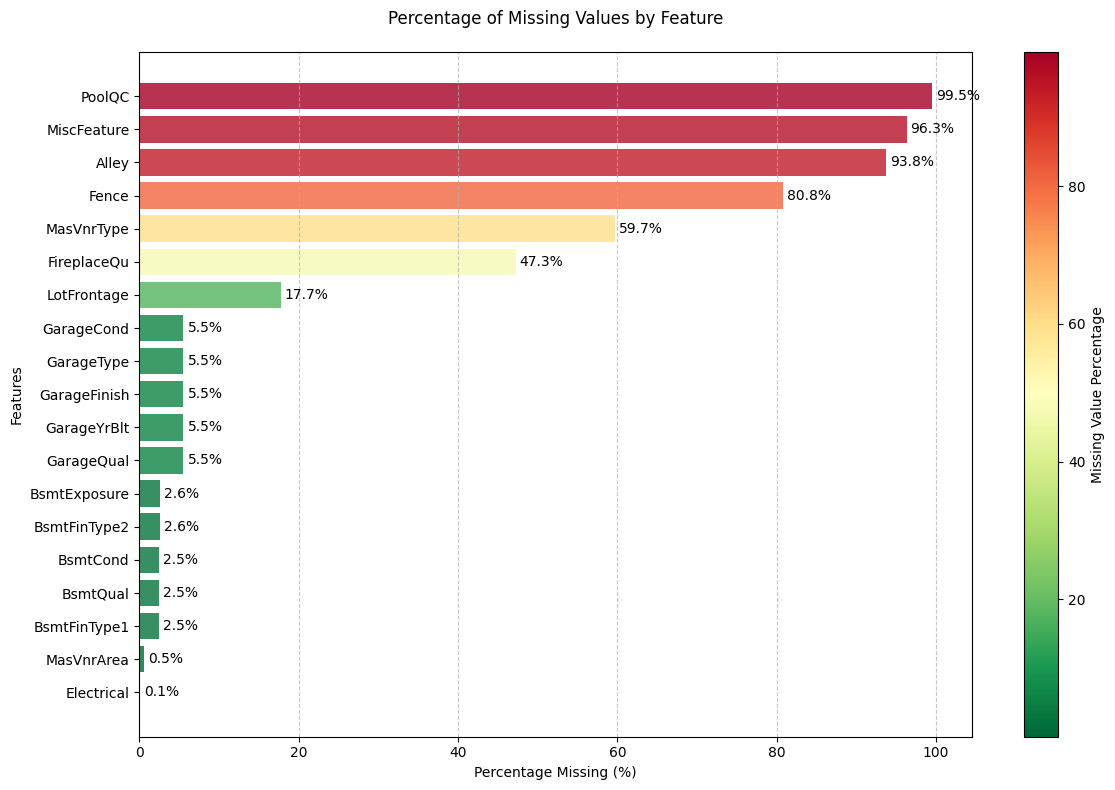

In [343]:
# Plot missing values
fig, ax = plt.subplots(figsize=(12, 8))
missing_values = df_train.isnull().sum().sort_values(ascending=True) 
missing_percent = (missing_values / len(df_train)) * 100

missing_percent = missing_percent[missing_percent > 0]

cmap = plt.cm.get_cmap('RdYlGn_r')
norm = plt.Normalize(missing_percent.min(), missing_percent.max())
colors = [cmap(norm(value)) for value in missing_percent]

bars = ax.barh(range(len(missing_percent)), missing_percent, 
                color=colors, alpha=0.8)
ax.set_yticks(range(len(missing_percent)))
ax.set_yticklabels(missing_percent.index)

for i, v in enumerate(missing_percent):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

ax.set_title('Percentage of Missing Values by Feature', pad=20, fontsize=12)
ax.set_xlabel('Percentage Missing (%)', fontsize=10)
ax.set_ylabel('Features', fontsize=10)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Missing Value Percentage')

ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [344]:
missing_percent = (df_train.isnull().sum() / len(df_train)) * 100
features_to_drop = missing_percent[missing_percent > 15].index
df_train = df_train.drop(columns=features_to_drop)
df_test = df_test.drop(columns=features_to_drop)

df_train = df_train.dropna()
df_test = df_test.dropna()


In [345]:
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


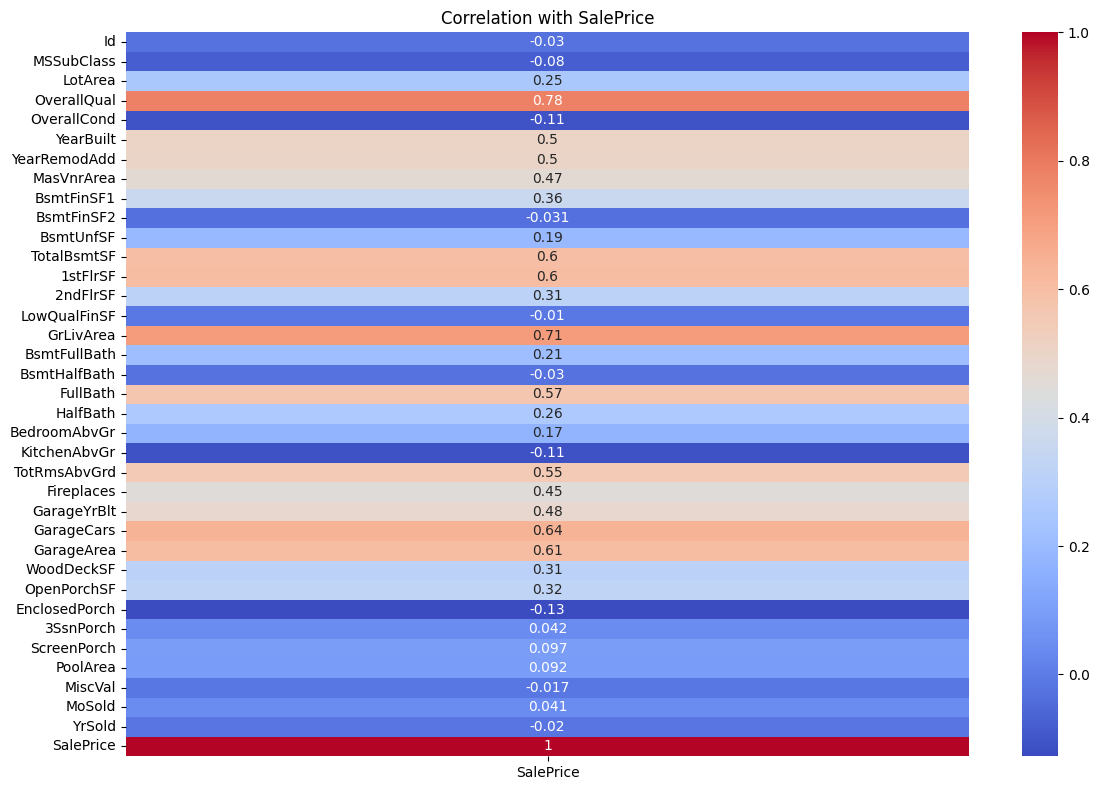

In [346]:
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_train[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.tight_layout()
plt.show()

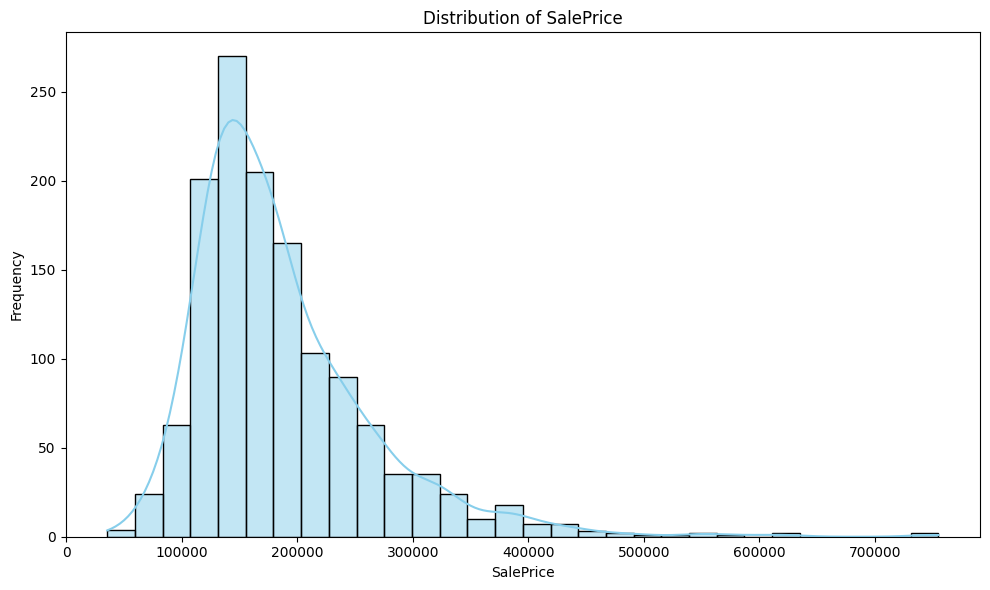

In [347]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train["SalePrice"], kde=True, color="skyblue", bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


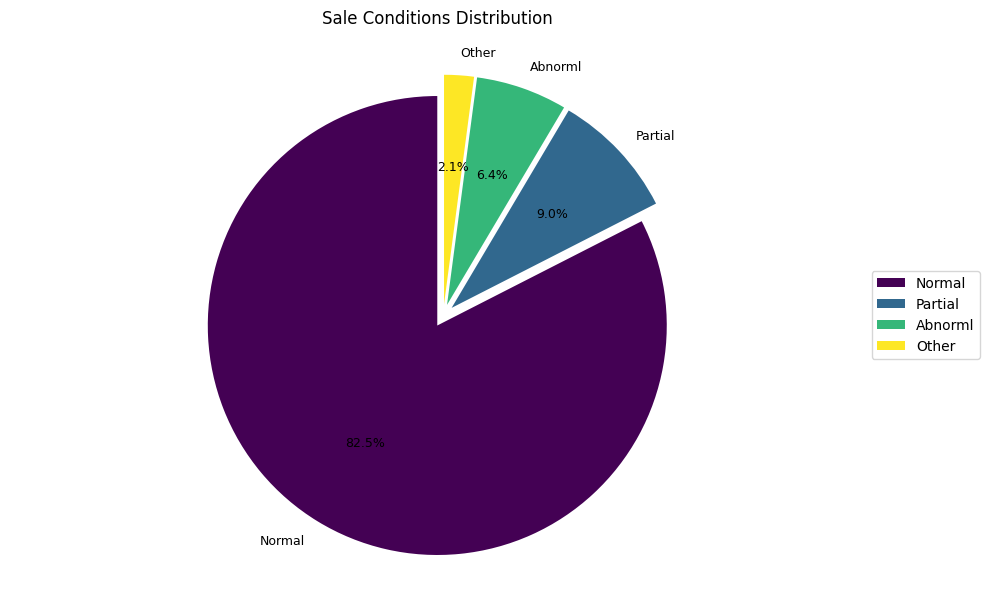

In [348]:

plt.figure(figsize=(10, 6))
sale_condition_counts = df_train['SaleCondition'].value_counts()
sale_condition_percent = (sale_condition_counts / len(df_train)) * 100

mask = sale_condition_percent < 5
other_sum = sale_condition_counts[mask].sum()
sale_condition_counts_grouped = sale_condition_counts[~mask]
sale_condition_counts_grouped['Other'] = other_sum

explode = [0.05] * len(sale_condition_counts_grouped)
colors = plt.cm.viridis(np.linspace(0, 1, len(sale_condition_counts_grouped)))

plt.pie(sale_condition_counts_grouped, labels=sale_condition_counts_grouped.index,
        autopct='%1.1f%%', startangle=90, shadow=False,
        colors=colors, explode=explode, textprops={'fontsize': 9})

plt.title('Sale Conditions Distribution', fontsize=12, pad=20)

plt.legend(sale_condition_counts_grouped.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9684\405908331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SaleCondition', y='SalePrice', data=df_train, palette='viridis')


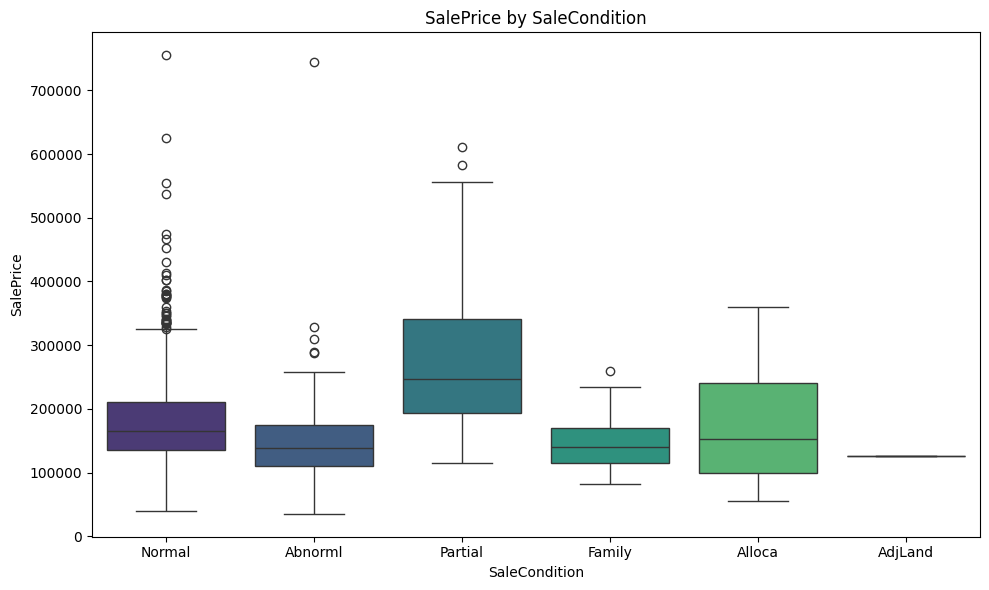

In [349]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df_train, palette='viridis')
plt.title('SalePrice by SaleCondition')
plt.xlabel('SaleCondition')
plt.ylabel('SalePrice')
plt.tight_layout()


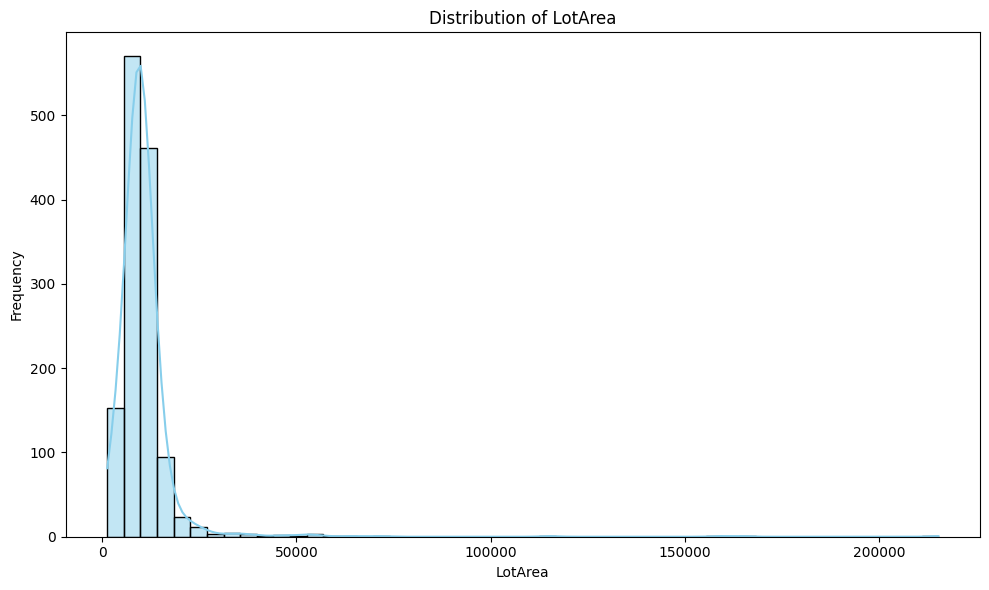

In [350]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['LotArea'], kde=True, color="skyblue", bins=50)
plt.title("Distribution of LotArea")
plt.xlabel("LotArea")
plt.ylabel("Frequency")
plt.tight_layout()


Text(0.5, 0, 'LotArea')

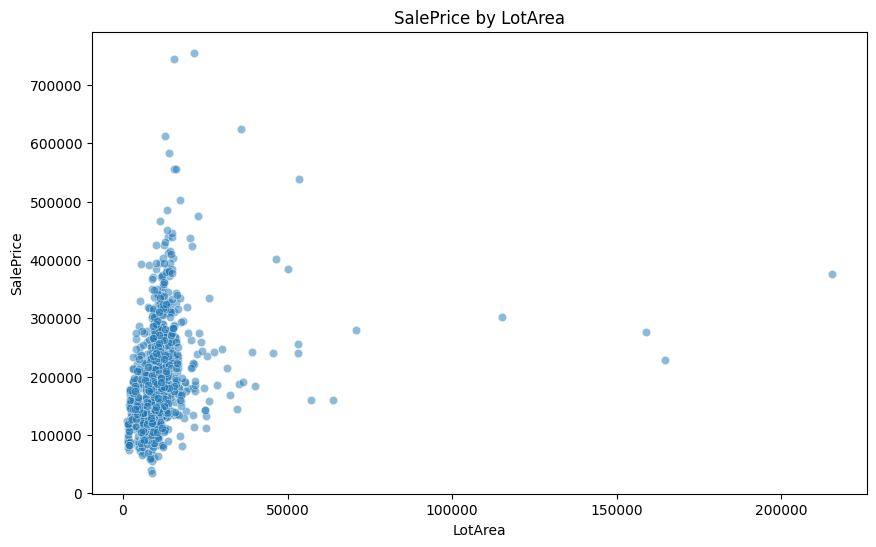

In [351]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df_train, alpha=0.5)
plt.title("SalePrice by LotArea")
plt.xlabel("LotArea")

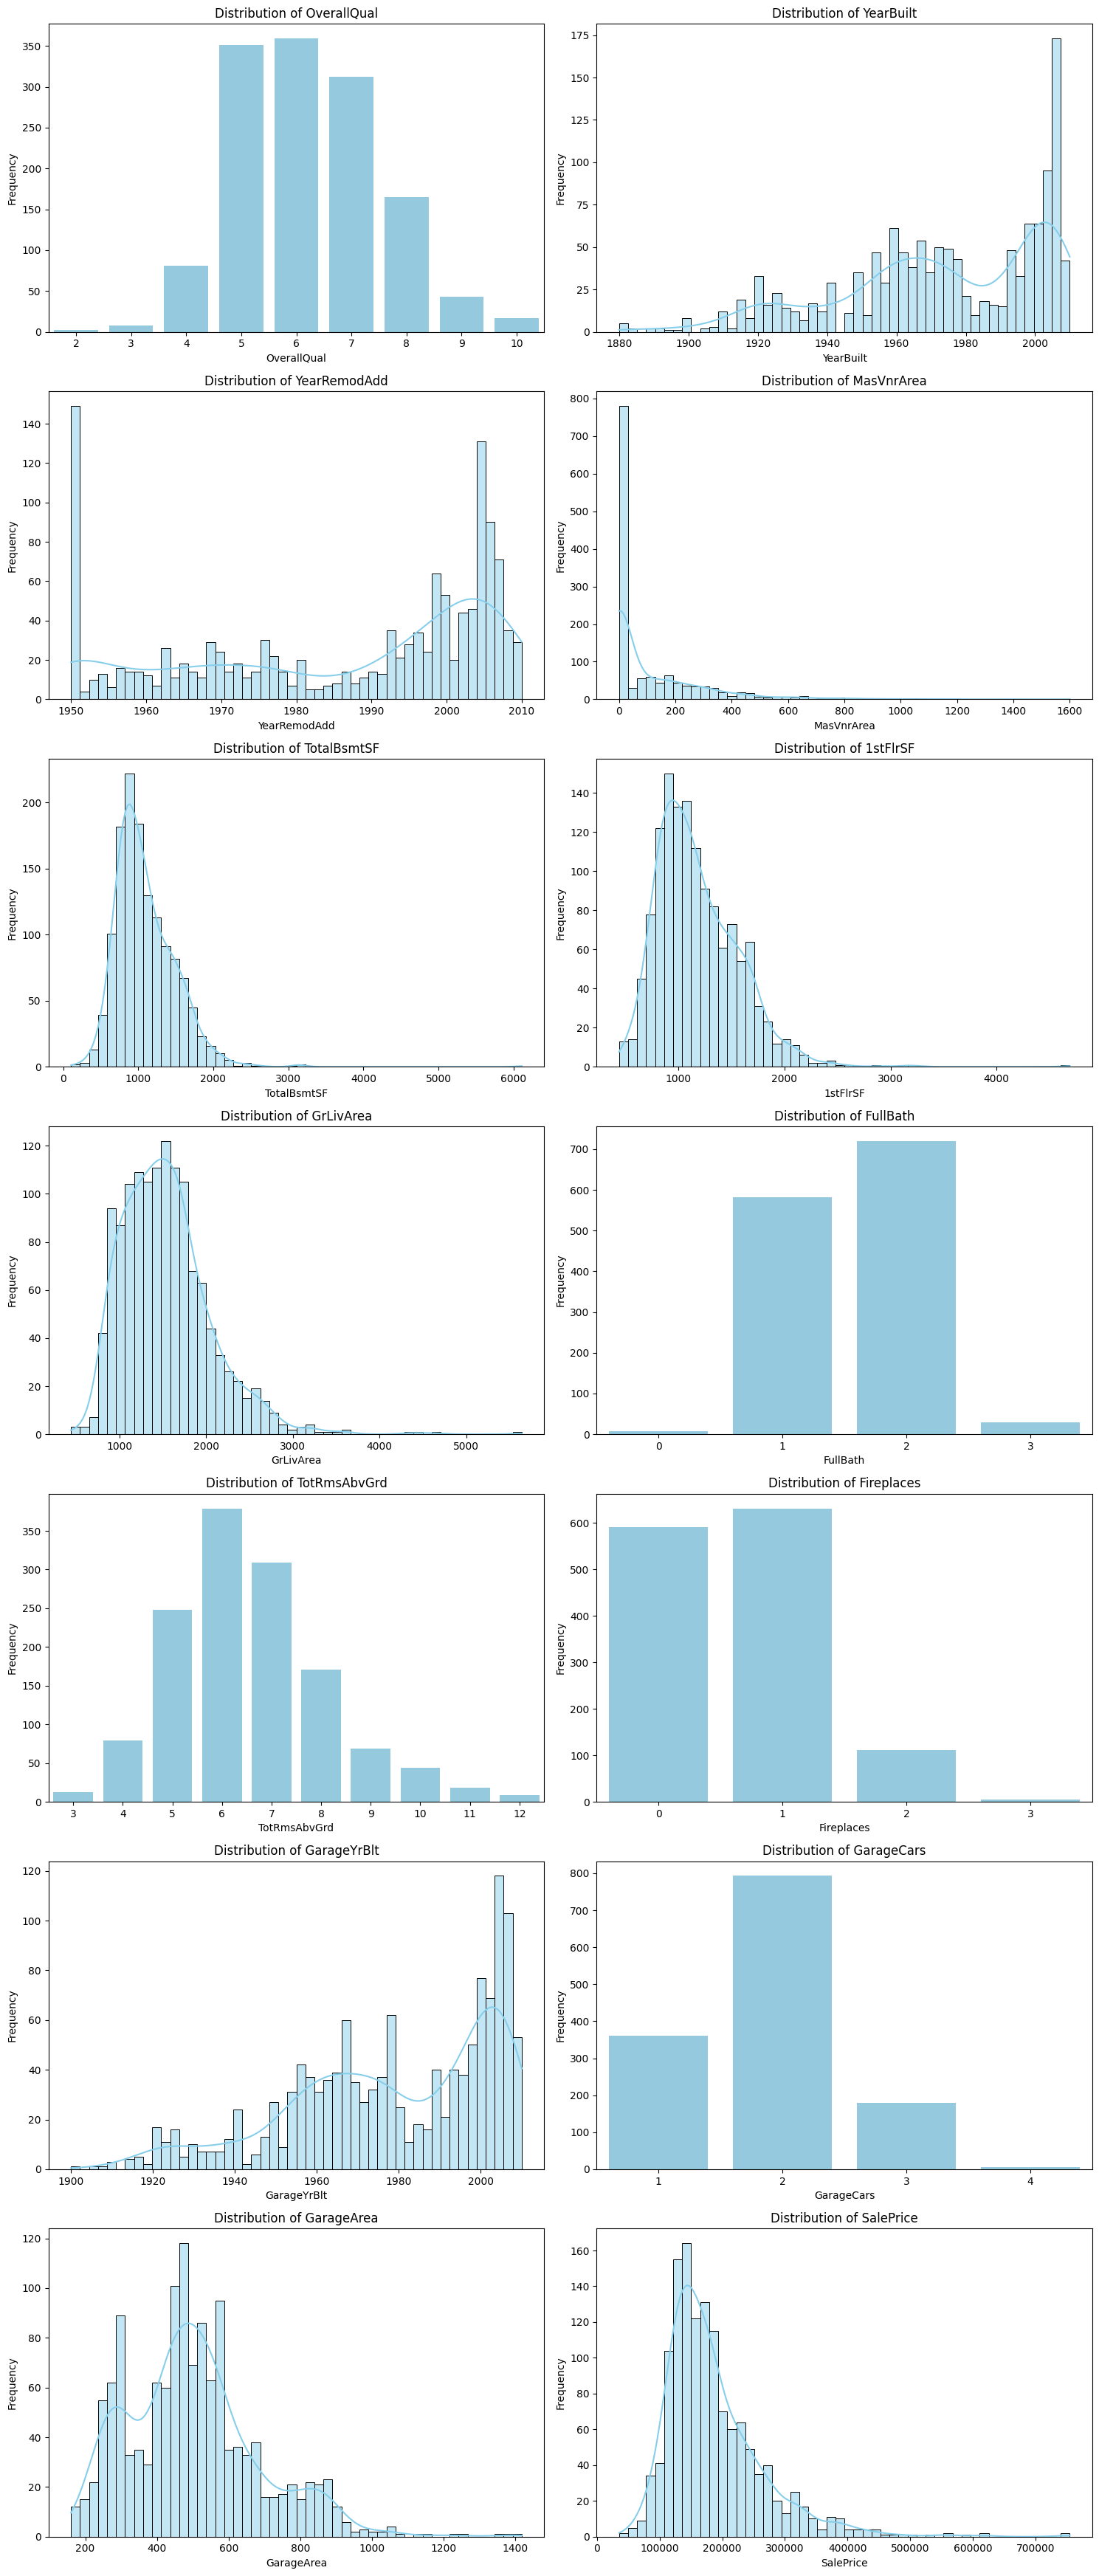

In [352]:
high_corr_features = correlation_matrix[abs(correlation_matrix['SalePrice']) > 0.4].index
n_features = len(high_corr_features)
n_cols = 2
n_rows = (n_features + 1) // 2

plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(high_corr_features):
    plt.subplot(n_rows, n_cols, i+1)
    if df_train[feature].max() < 20:
        sns.countplot(data=df_train, x=feature, color="skyblue")
    else:
        sns.histplot(df_train[feature], kde=True, color="skyblue", bins=50)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


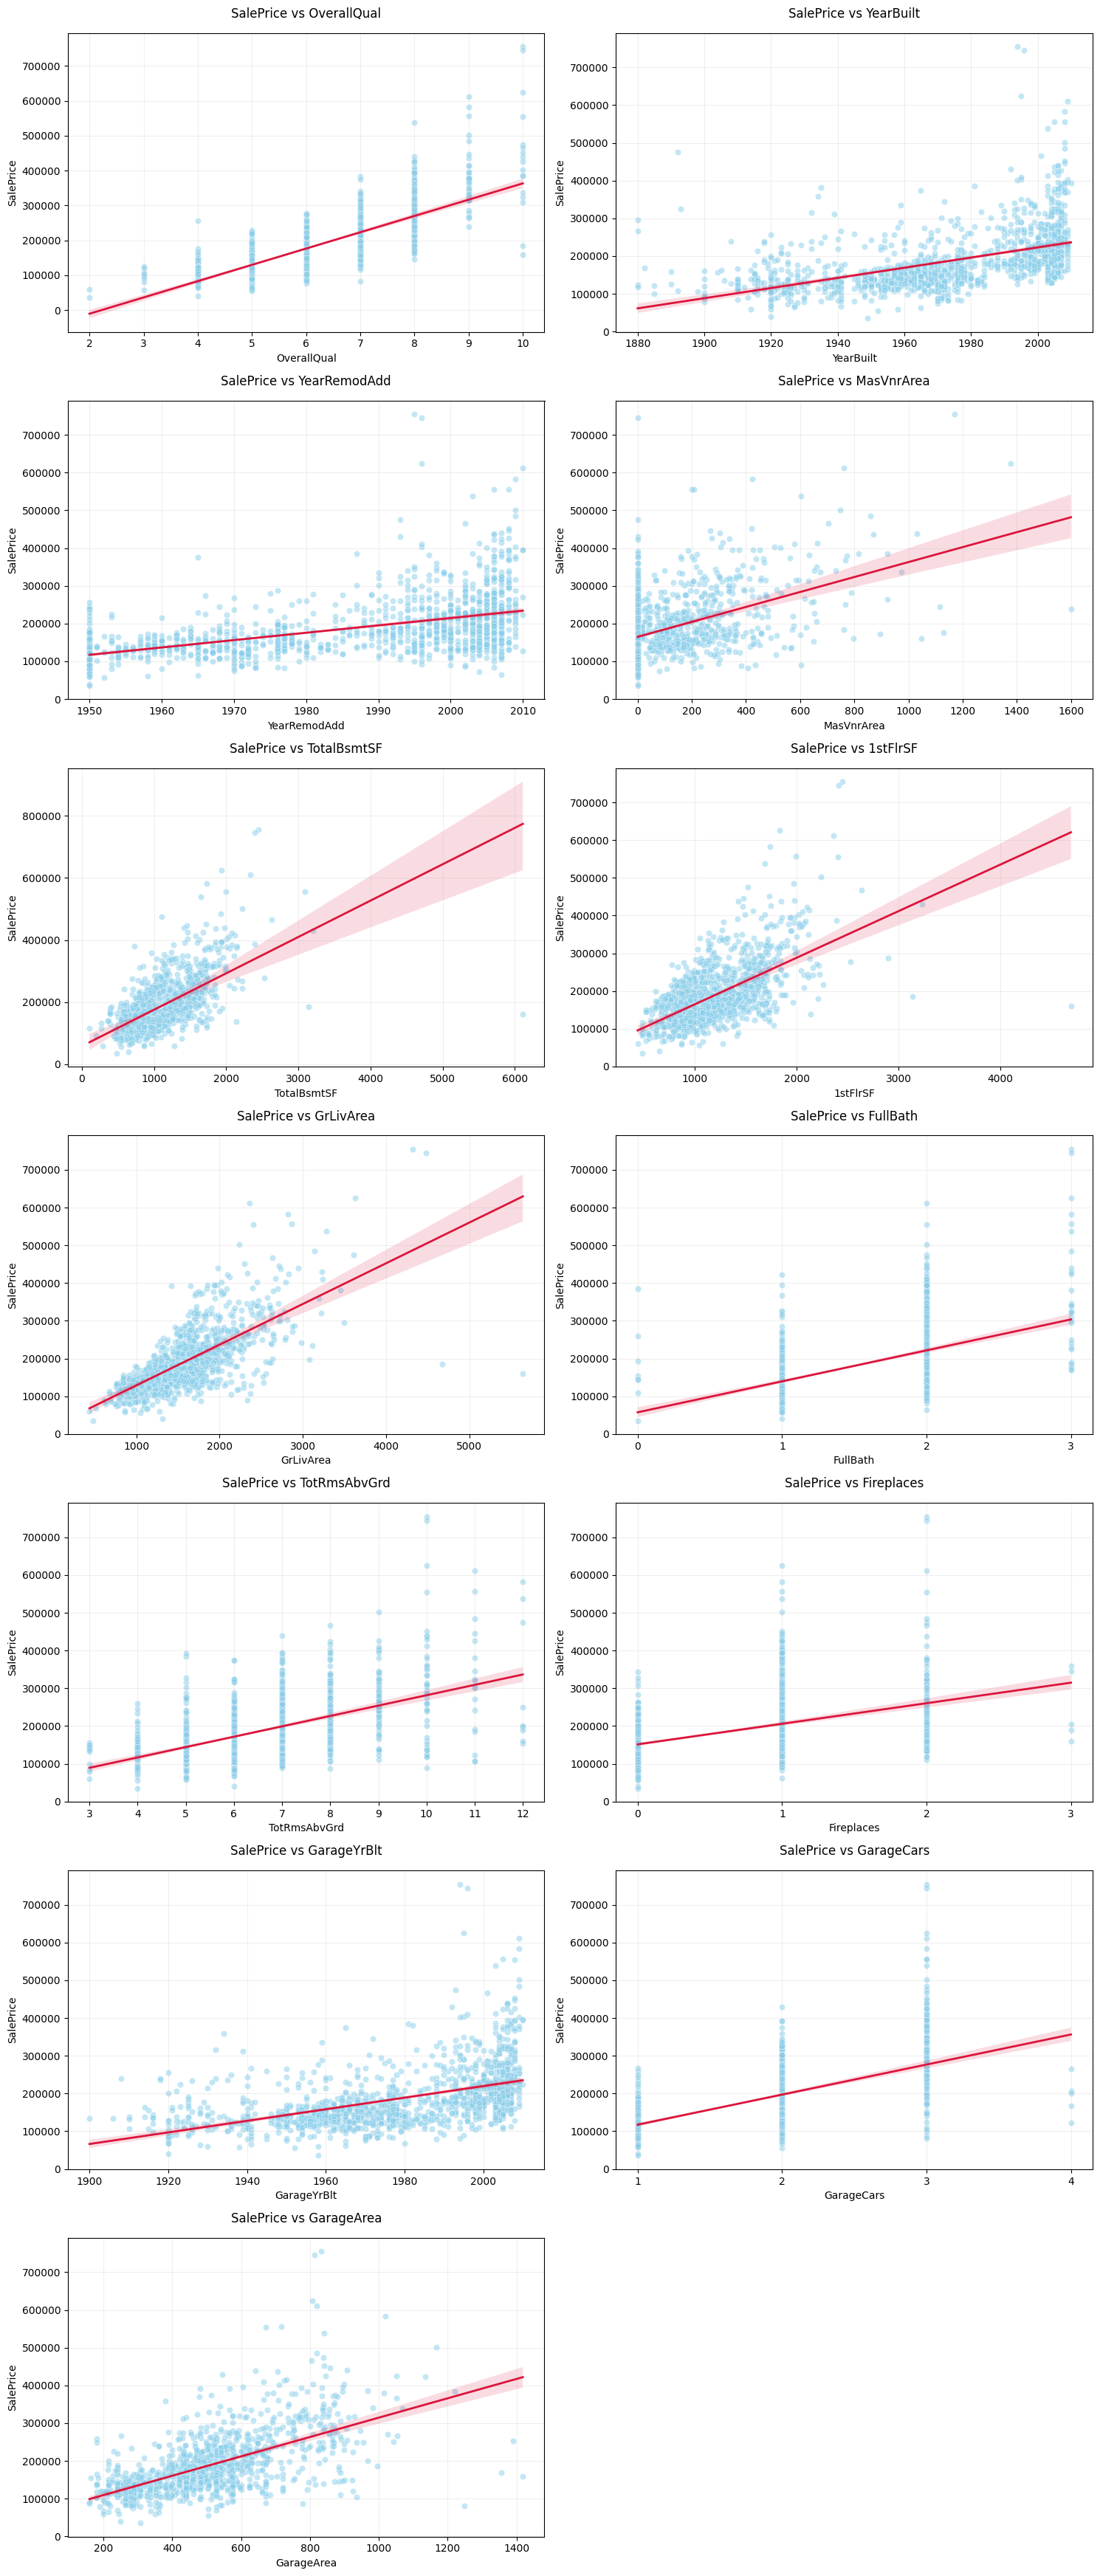

In [353]:
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(high_corr_features):
    if df_train[feature].dtype in ['int64', 'float64'] and feature != 'SalePrice':
        plt.subplot(n_rows, n_cols, i+1)
        sns.scatterplot(data=df_train, x=feature, y='SalePrice', alpha=0.5, color='skyblue')
        sns.regplot(data=df_train, x=feature, y='SalePrice', 
                   scatter=False, color='crimson', line_kws={'linewidth': 2})
        if df_train[feature].max() < 20:
            plt.xticks(range(int(df_train[feature].min()), int(df_train[feature].max())+1))
        plt.title(f"SalePrice vs {feature}", pad=15, fontsize=12)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel("SalePrice", fontsize=10)
        plt.grid(True, alpha=0.2)
        
plt.tight_layout()
plt.show()


In [354]:
n_categorical = df_train.select_dtypes(include=['object']).shape[1]
print(f"Number of categorical features: {n_categorical}")


Number of categorical features: 37


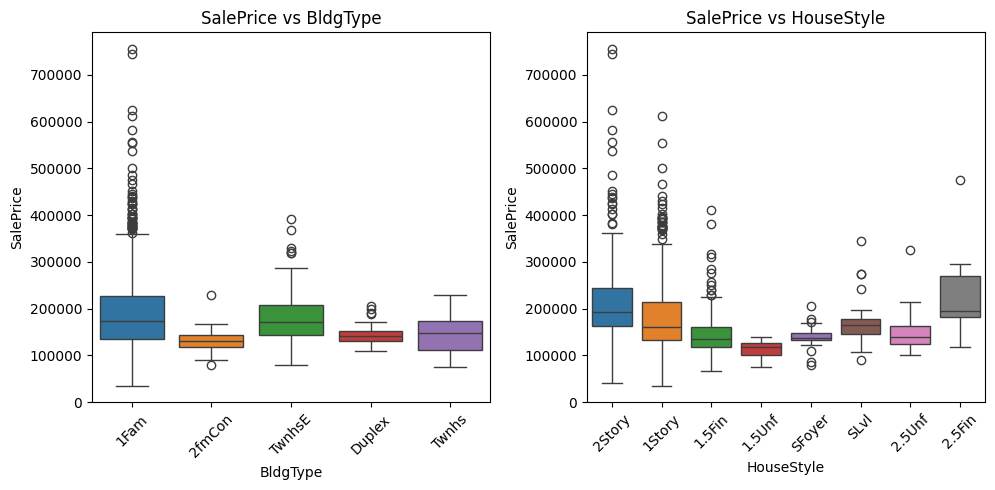

In [355]:
categorical_features = ['BldgType', 'HouseStyle']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_train, x=feature, y='SalePrice', hue=feature, legend=False)
    plt.title(f'SalePrice vs {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


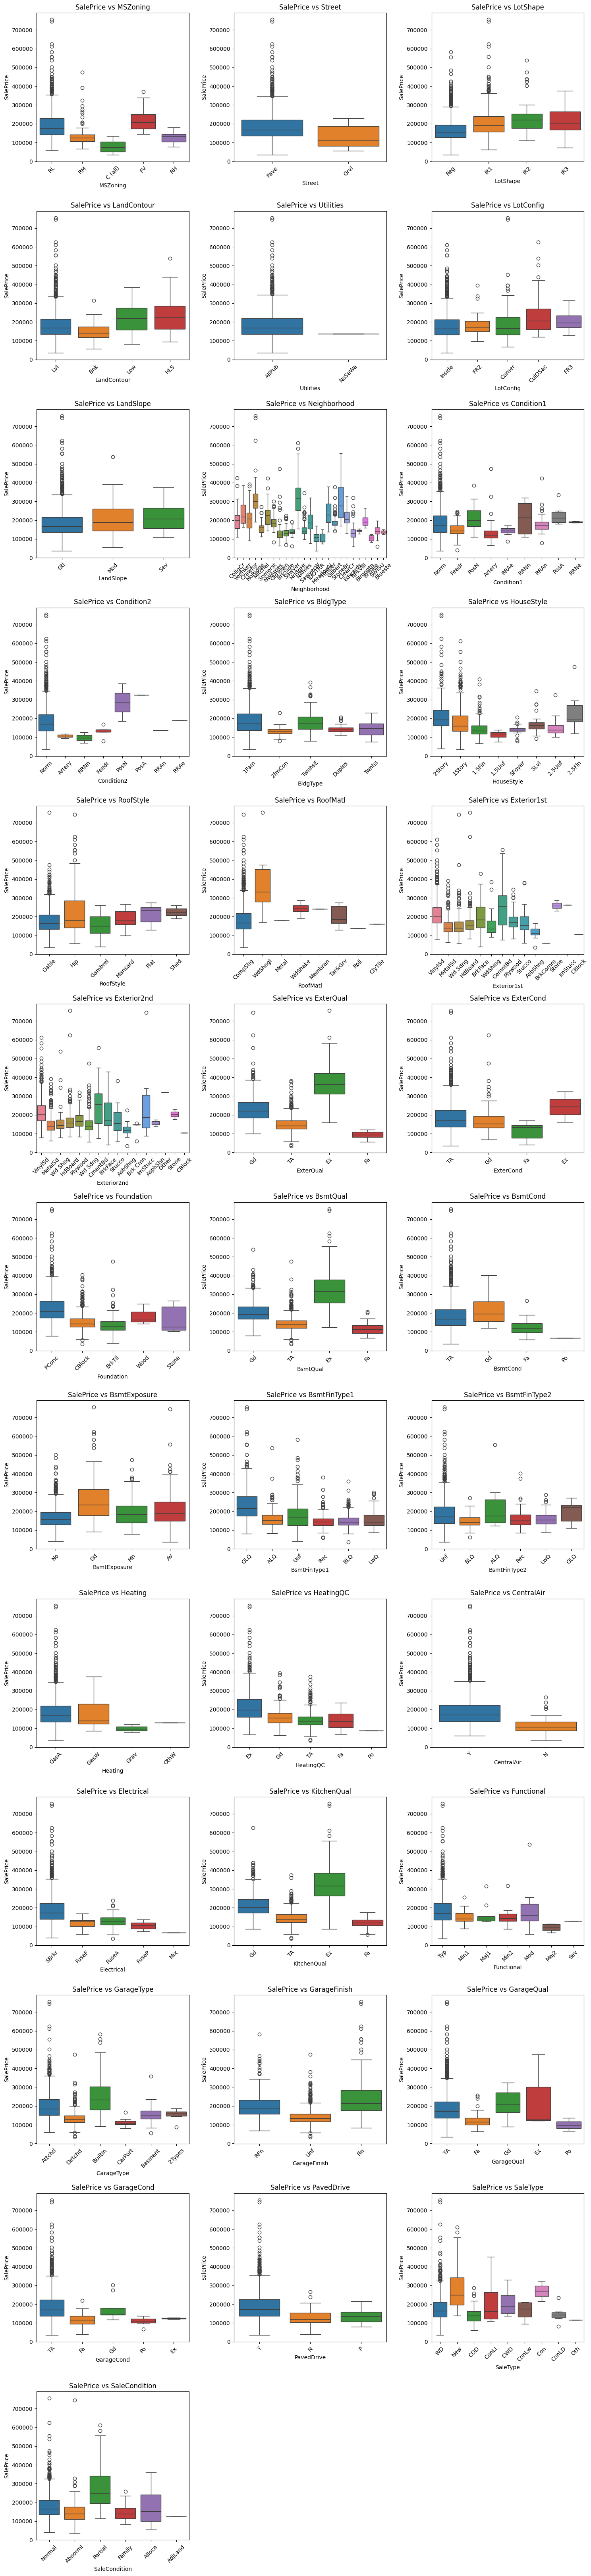

In [356]:
categorical_features = df_train.select_dtypes(include=['object']).columns
n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(data=df_train, x=feature, y='SalePrice', hue=feature, legend=False)
    plt.title(f'SalePrice vs {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Features used: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Training MSE: 1403510469.57
Training RMSE: 37463.46
Training R2 Score: 0.7745

Prediction Statistics:
Train Predictions:
Mean: 186761.78
Std: 69420.68
Min: -13723.25
Max: 655199.03

Test Predictions:
Mean: 183534.26
Std: 70831.64
Min: -6804.50
Max: 624016.61


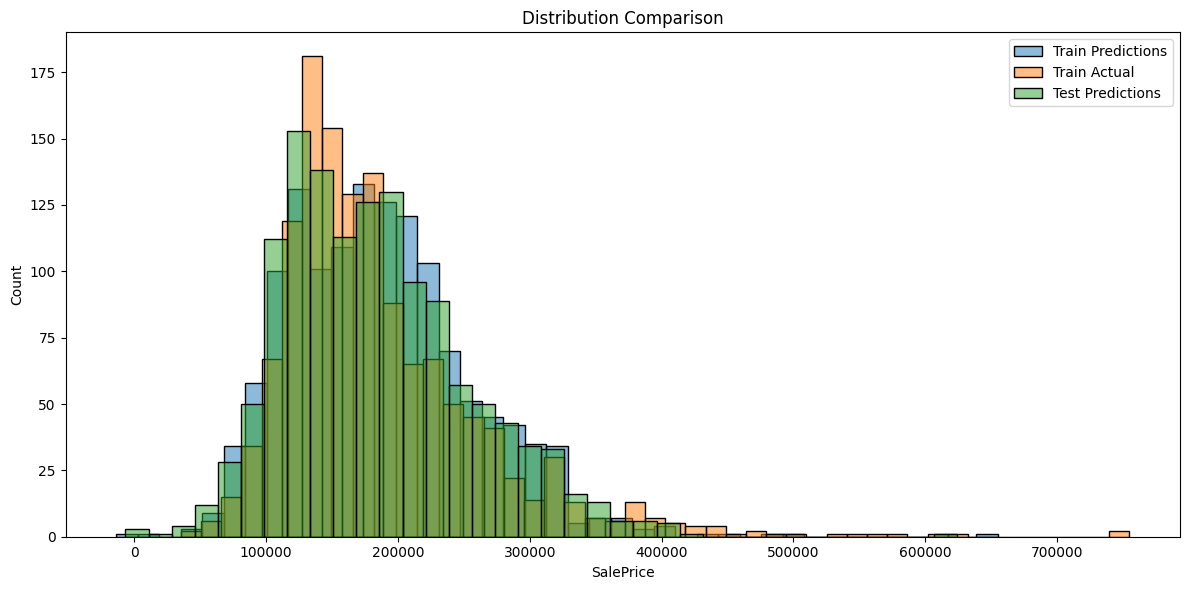

In [357]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = df_train.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1).columns
correlations = df_train[numeric_features].corrwith(df_train['SalePrice'])
high_corr_features = correlations[abs(correlations) > 0.4].index

model = LinearRegression()
X_train = df_train[high_corr_features]
y_train = df_train['SalePrice']

model.fit(X_train, y_train)

X_test = df_test[high_corr_features]
y_pred = model.predict(X_test)

train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)

print("Features used:", high_corr_features.tolist())
print(f"Training MSE: {train_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R2 Score: {train_r2:.4f}")

print("\nPrediction vs Actual Statistics:")
print("Train Data:")
print(f"Predictions - Mean: {train_pred.mean():.2f}, Std: {train_pred.std():.2f}, Min: {train_pred.min():.2f}, Max: {train_pred.max():.2f}")
print(f"Actual      - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}, Min: {y_train.min():.2f}, Max: {y_train.max():.2f}")

print("\nTest Data:")
print(f"Predictions - Mean: {y_pred.mean():.2f}, Std: {y_pred.std():.2f}, Min: {y_pred.min():.2f}, Max: {y_pred.max():.2f}")

plt.figure(figsize=(12,6))
sns.histplot(train_pred, label='Train Predictions', alpha=0.5)
sns.histplot(y_train, label='Train Actual', alpha=0.5)
sns.histplot(y_pred, label='Test Predictions', alpha=0.5)
plt.title('Distribution Comparison')
plt.legend()
plt.tight_layout()
plt.show()


## Regresi Linear
Regresi linear adalah metode statistik dasar yang banyak digunakan untuk memodelkan hubungan antara variabel dependen (target) dan satu atau lebih variabel independen (fitur). Metode ini mengasumsikan adanya hubungan linear antara variabel-variabel tersebut. Model ini mencari garis lurus yang paling sesuai melalui titik-titik dengan meminimalkan perbedaan antara nilai prediksi dan nilai aktual.
### Formula
Untuk regresi linear sederhana:
y = mx + b
dimana:
- y adalah nilai prediksi
- m adalah kemiringan (koefisien)
- x adalah fitur input
- b adalah titik potong y

Untuk regresi linear berganda:
y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
dimana:
- β₀ adalah intercept
- βᵢ adalah koefisien
- xᵢ adalah nilai fitur

## Metrik Evaluasi Model

### Mean Squared Error (MSE)
- Mengukur rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual
- Error yang lebih besar akan mendapat penalti lebih berat karena dikuadratkan
- MSE yang lebih rendah menunjukkan performa model yang lebih baik

#### Formula
MSE = (1/n) Σ(yᵢ - ŷᵢ)²
dimana:
- n adalah jumlah observasi
- yᵢ adalah nilai aktual
- ŷᵢ adalah nilai prediksi

### Root Mean Squared Error (RMSE)
- Akar kuadrat dari MSE
- Lebih mudah diinterpretasi daripada MSE karena memiliki satuan yang sama dengan variabel target
- Seperti MSE, nilai yang lebih rendah menunjukkan performa yang lebih baik

#### Formula
RMSE = √[(1/n) Σ(yᵢ - ŷᵢ)²]

### R-squared (R²) Score
- Mengukur proporsi varians dalam variabel target yang dijelaskan oleh model
- Rentang nilai dari 0 sampai 1 (atau 0% sampai 100%)
- Nilai yang lebih tinggi menunjukkan kesesuaian yang lebih baik:
  - R² = 1: Kesesuaian sempurna, model menjelaskan semua variabilitas
  - R² = 0: Model tidak menjelaskan variabilitas apapun
  - R² = 0.7 berarti model menjelaskan 70% variabilitas

#### Formula
R² = 1 - (SSres/SStot)
dimana:
- SSres = Σ(yᵢ - ŷᵢ)² (Jumlah kuadrat residual)
- SStot = Σ(yᵢ - ȳ)² (Jumlah kuadrat total)
- ȳ adalah rata-rata nilai aktual
